In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [2]:
datapath = 'https://web.stanford.edu/~hastie/Papers/LARS/diabetes.data'
diastats_raw = pd.read_csv(datapath, sep='\t')

diastats_raw.head()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,59,2,32.1,101.0,157,93.2,38.0,4.0,4.8598,87,151
1,48,1,21.6,87.0,183,103.2,70.0,3.0,3.8918,69,75
2,72,2,30.5,93.0,156,93.6,41.0,4.0,4.6728,85,141
3,24,1,25.3,84.0,198,131.4,40.0,5.0,4.8903,89,206
4,50,1,23.0,101.0,192,125.4,52.0,4.0,4.2905,80,135


In [3]:
#check data size
diastats_raw.shape

(442, 11)

In [4]:
diastats_raw.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
SEX,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
BMI,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
BP,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
S1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
S2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
S3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
S4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
S5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
S6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


In [5]:
#Normalize & standardize data
diastats_scale = preprocessing.scale(diastats_raw)
diastats_norm = preprocessing.normalize(diastats_scale, norm='l2')
diastats_pr = pd.DataFrame(diastats_norm)


In [6]:
#dataframe index 0=AGE 1=SEX 2=BMI 3=BP 4=S1 5=S2 6=S3 7=S4 8=S5 9=S6 10=Y
diastats = diastats_pr.rename(columns={0: 'AGE', 1: 'SEX', 2: 'BMI', 3: 'BP', 4: 'S1', 5: 'S2', 6: 'S3', 7: 'S4', 8: 'S5', 9: 'S6', 10: 'Y'})

In [7]:
diastats.head()
#diastats.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
0,0.321001,0.427261,0.520133,0.184396,-0.372828,-0.293558,-0.365893,-0.021854,0.167831,-0.148767,-0.005903
1,-0.011184,-0.265295,-0.305899,-0.156459,-0.050209,-0.113883,0.442211,-0.234700,-0.406079,-0.547948,-0.283138
2,0.656485,0.390049,0.342110,-0.043641,-0.350947,-0.263171,-0.249021,-0.019951,0.022021,-0.199567,-0.052927
3,-0.696281,-0.349002,-0.090648,-0.286572,0.095304,0.195373,-0.281736,0.268222,0.177369,-0.073190,0.260119
4,0.062298,-0.516635,-0.421078,0.253128,0.045538,0.180493,0.094228,-0.030000,-0.370191,-0.539772,-0.122477


In [8]:
diastats.corr()

,AGE,SEX,BMI,BP,S1,S2,S3,S4,S5,S6,Y
AGE,1.000000,0.208030,0.128275,0.314105,0.212787,0.188311,-0.068217,0.160461,0.220149,0.266565,0.142843
SEX,0.208030,1.000000,0.021171,0.197764,-0.011789,0.105358,-0.363505,0.304267,0.125671,0.185090,-0.020325
BMI,0.128275,0.021171,1.000000,0.314518,0.184651,0.187617,-0.293827,0.324378,0.374178,0.281844,0.499672
BP,0.314105,0.197764,0.314518,1.000000,0.197854,0.143959,-0.122200,0.187932,0.321758,0.334497,0.353836
S1,0.212787,-0.011789,0.184651,0.197854,1.000000,0.885139,0.134815,0.461783,0.447956,0.251869,0.160939
S2,0.188311,0.105358,0.187617,0.143959,0.885139,1.000000,-0.149848,0.617509,0.241122,0.229963,0.110372
S3,-0.068217,-0.363505,-0.293827,-0.122200,0.134815,-0.149848,1.000000,-0.740931,-0.360845,-0.218174,-0.310885
S4,0.160461,0.304267,0.324378,0.187932,0.461783,0.617509,-0.740931,1.000000,0.560912,0.326808,0.353517
S5,0.220149,0.125671,0.374178,0.321758,0.447956,0.241122,-0.360845,0.560912,1.000000,0.375266,0.502049
S6,0.266565,0.185090,0.281844,0.334497,0.251869,0.229963,-0.218174,0.326808,0.375266,1.000000,0.265805


Q1 answer
Correlation for Y is highest for S5, it will be used as the single feature for prediction. Plot is shown below:


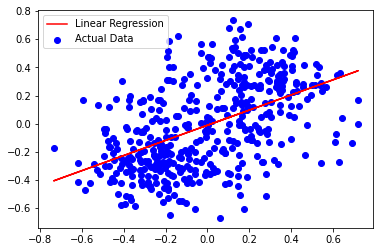

Intercept:  -0.01085472273303687
Slope:  [0.53734278]
MSE:  0.07346021405447363
Model Score: 0.2520533421426957


In [9]:
#Q1 block
print('Q1 answer')
print('Correlation for Y is highest for S5, it will be used as the single feature for prediction. Plot is shown below:')

x = diastats['S5'].values.reshape(-1,1)
y = diastats['Y']
LR = LinearRegression()
model = LR.fit(x, y)
prediction = model.predict(x)
plt.plot(x, prediction, label ='Linear Regression', color = 'r')
plt.scatter(x, y, label='Actual Data', color = 'b')
plt.legend()
plt.show()

print('Intercept: ', LR.intercept_)
print('Slope: ', LR.coef_)
print('MSE: ', mean_squared_error(y, prediction))
print('Model Score:', model.score(x, y))

Q1 answer
Since correlation for Y is highest for BMI from the raw data, so let us take a look as well. Plot is shown below:


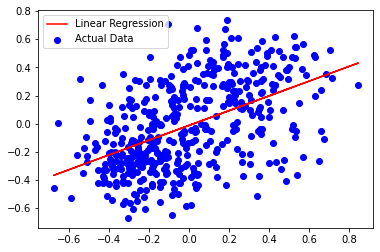

Intercept:  -0.012021404903191844
Slope:  [0.52482733]
MSE:  0.07369413031321566
Model Score: 0.2496716871720902


In [10]:
#Q1 block2
print('Q1 answer')
print('Since correlation for Y is highest for BMI from the raw data, so let us take a look as well. Plot is shown below:')

x = diastats['BMI'].values.reshape(-1,1)
y = diastats['Y']
LR = LinearRegression()
model = LR.fit(x, y)
prediction = model.predict(x)
plt.plot(x, prediction, label ='Linear Regression', color = 'r')
plt.scatter(x, y, label='Actual Data', color = 'b')
plt.legend()
plt.show()

print('Intercept: ', LR.intercept_)
print('Slope: ', LR.coef_)
print('MSE: ', mean_squared_error(y, prediction))
print('Model Score:', model.score(x, y))

Q2 answer
Since correlation for Y is highest for BMI and S5 pair, it will be used as the pair feature for prediction. Plot is shown below (The plot does not seem valid as it is trying to plot a 3D relation onto a 2D plane & plotting seperately):


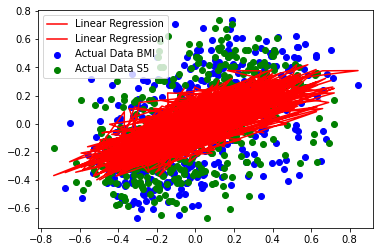

Intercept:  -0.009085515192309853
Slope:  [0.38083428 0.3921356 ]
MSE:  0.062356104788260536
Model Score: 0.365111567211135


In [11]:
#Q2 block
print('Q2 answer')
print('Since correlation for Y is highest for BMI and S5 pair, it will be used as the pair feature for prediction. Plot is shown below (The plot does not seem valid as it is trying to plot a 3D relation onto a 2D plane & plotting seperately):')

x = diastats[['BMI','S5']]
y = diastats['Y']
LR = LinearRegression()
model = LR.fit(x, y)
#LinearRegression(normalize=True)
prediction = model.predict(x)
plt.plot(x, prediction, label ='Linear Regression', color = 'r')
plt.scatter(x.BMI, y, label='Actual Data BMI', color = 'b')
plt.scatter(x.S5, y, label='Actual Data S5', color = 'g')
plt.legend()
plt.show()

#print(prediction)
print('Intercept: ', LR.intercept_)
print('Slope: ', LR.coef_)
print('MSE: ', mean_squared_error(y, prediction))
print('Model Score:', model.score(x, y))

Alternative plot for Q2
Model Score:  0.365111567211135


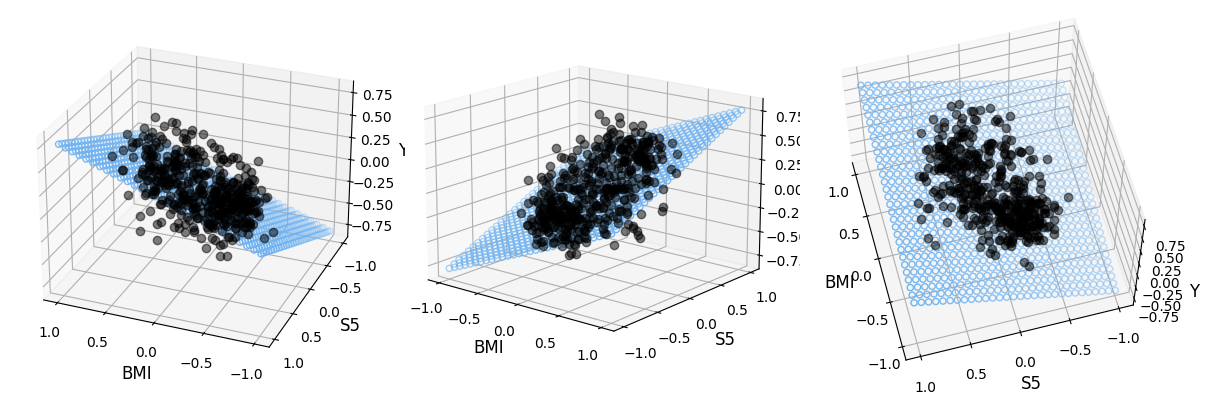

In [12]:
#Q2 Alternative 3D plotting. Code block for 3D visualization and data formatting is borrowed from 'https://aegis4048.github.io'
X = diastats[['BMI','S5']].values.reshape(-1,2)
Y = diastats['Y']

#Formatting data for 3D visualization
x = X[:, 0]
y = X[:, 1]
z = Y

x_pred = np.linspace(-1, 1, 30)      
y_pred = np.linspace(-1, 1, 30)  
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

#Fitting regression model
LR = LinearRegression()
model = LR.fit(X, Y)
prediction = model.predict(model_viz)
model.score(X, Y)

#ploting block borrowed from 'https://aegis4048.github.io'
print('Alternative plot for Q2')
print('Model Score: ', model.score(X, Y))


plt.style.use('default')

fig = plt.figure(figsize=(12, 4))

ax1 = fig.add_subplot(131, projection='3d')
ax2 = fig.add_subplot(132, projection='3d')
ax3 = fig.add_subplot(133, projection='3d')

axes = [ax1, ax2, ax3]

for ax in axes:
    ax.plot(x, y, z, color='k', zorder=15, linestyle='none', marker='o', alpha=0.5)
    ax.scatter(xx_pred.flatten(), yy_pred.flatten(), prediction, facecolor=(0,0,0,0), s=20, edgecolor='#70b3f1')
    ax.set_xlabel('BMI', fontsize=12)
    ax.set_ylabel('S5', fontsize=12)
    ax.set_zlabel('Y', fontsize=12)
    ax.locator_params(nbins=4, axis='x')
    ax.locator_params(nbins=5, axis='x')


ax1.view_init(elev=27, azim=112)
ax2.view_init(elev=16, azim=-51)
ax3.view_init(elev=60, azim=165)


fig.tight_layout()

In [13]:
#Q3 block
print('Q3 answer')
print('Linear Regresssion model characteristics for using all features are as follows: ')

x = diastats[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = diastats['Y']
LR = LinearRegression()
model = LR.fit(x, y)
prediction = model.predict(x)

print('Intercept: ', LR.intercept_)
print('Slope: ', LR.coef_)
print('MSE: ', mean_squared_error(y, prediction))
print('Model Score:', model.score(x, y))

Q3 answer
Linear Regresssion model characteristics for using all features are as follows: 
Intercept:  -0.00947571049966384
Slope:  [ 0.01253387 -0.14341358  0.31058637  0.18299776 -0.29743361  0.11799339
  0.03584823  0.15626604  0.40086034  0.01362229]
MSE:  0.057473440181207563
Model Score: 0.41482518050901274


In [14]:
#Q4 block
x = diastats[['AGE', 'SEX', 'BMI', 'BP', 'S1', 'S2', 'S3', 'S4', 'S5', 'S6']]
y = diastats['Y']
#train size 20
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=20)
LR = LinearRegression()
model_train = LR.fit(x_train, y_train)
prediction_train = model_train.predict(x_train)
print('Train size 20')
print('-Training MSE: ', mean_squared_error(y_train, prediction_train))
prediction_validation = model_train.predict(x_test)
print('-Validation MSE: ', mean_squared_error(y_test, prediction_validation))


#train size 50
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=50)
LR = LinearRegression()
model_train = LR.fit(x_train, y_train)
prediction_train = model_train.predict(x_train)
print('Train size 50')
print('-Training MSE: ', mean_squared_error(y_train, prediction_train))
prediction_validation = model_train.predict(x_test)
print('-Validation MSE: ', mean_squared_error(y_test, prediction_validation))


#train size 100
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=100)
LR = LinearRegression()
model_train = LR.fit(x_train, y_train)
prediction_train = model_train.predict(x_train)
print('Train size 100')
print('-Training MSE: ', mean_squared_error(y_train, prediction_train))
prediction_validation = model_train.predict(x_test)
print('-Validation MSE: : ', mean_squared_error(y_test, prediction_validation))


#train size 200
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=200)
LR = LinearRegression()
model_train = LR.fit(x_train, y_train)
prediction_train = model_train.predict(x_train)
print('Train size 200')
print('-Training MSE: ', mean_squared_error(y_train, prediction_train))
prediction_validation = model_train.predict(x_test)
print('-Validation MSE: : ', mean_squared_error(y_test, prediction_validation))

Train size 20
-Training MSE:  0.017331170589830573
-Validation MSE:  0.11650161885492584
Train size 50
-Training MSE:  0.049985717529715847
-Validation MSE:  0.09552553185087706
Train size 100
-Training MSE:  0.05959994134198225
-Validation MSE: :  0.07117314023349784
Train size 200
-Training MSE:  0.05718631294810351
-Validation MSE: :  0.059941644049204414


In [ ]:
#CS675 project 1 Eric Chen sc54336n@pace.edu